<a href="https://colab.research.google.com/github/Gita2023/InternIntelligence_ProjectName/blob/main/TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task One (Predictive Analytics Model)**

**Import Libraries**

In [1]:
# Data Manipulation #
import pandas as pd
import numpy as np

# Machine Learning #
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error

# Time Series Modeling #
from statsmodels.tsa.arima.model import ARIMA

# Advanced Machine Learning #
from xgboost import XGBRegressor

# Visualization #
import matplotlib.pyplot as plt

# Model Saving #
import joblib


**Load Data**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


**Inspect Dataset**

In [5]:
# Load dataset
df = pd.read_csv('weatherHistory.csv')

# Inspect the dataset #
print(df.head())  # View first 5 rows
print(df.info())  # View column data types and null counts
print(df.describe())  # Summary statistics of numerical columns


                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13  

**Data Cleaning**

In [7]:
# Drop constant column 'Loud Cover' #
if 'Loud Cover' in df.columns:
    df.drop(columns=['Loud Cover'], inplace=True)

# Fill missing values #
df['Temperature (C)'] = df['Temperature (C)'].fillna(df['Temperature (C)'].mean())
df['Precip Type'] = df['Precip Type'].fillna('Unknown')



**Data Preprocessing**


*   *Encode Categorical Columns*




In [8]:
# Encode categorical variables#
encoder = LabelEncoder()
df['Precip Type'] = encoder.fit_transform(df['Precip Type'])
df['Summary'] = encoder.fit_transform(df['Summary'])
df['Daily Summary'] = encoder.fit_transform(df['Daily Summary'])




* *Create Date-Based Features*




In [10]:
# Convert to datetime $
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True, errors='coerce')

# Drop rows #
df = df.dropna(subset=['Formatted Date'])

# Extract features #
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day
df['Hour'] = df['Formatted Date'].dt.hour





*   *Add Lag and Moving Average Features*




In [11]:
# Add lag feature (previous temperature)#
df['Lag_Temp'] = df['Temperature (C)'].shift(1)

# Add moving average (3-hour window)
df['Temp_MA3'] = df['Temperature (C)'].rolling(window=3).mean()




*   *Normalize Numerical Features*




In [12]:
# Normalize numerical columns#
scaler = MinMaxScaler()
numerical_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
                  'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


**Split Data**

*   *For Time Series Modeling*



In [ ]:
# Split chronologically (80% train, 20% test) #
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]





*   *For Time Series Modeling*






In [13]:
# Split chronologically (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]




*  *For Regression Modeling*




In [14]:
# Define features (X) and target (y)
X = df[numerical_cols + ['Precip Type', 'Summary', 'Lag_Temp', 'Temp_MA3']].dropna()
y = df['Temperature (C)'][X.index]

# Random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Build Models**

*   *Train Time Series Model (ARIMA)*




In [ ]:
# Train ARIMA #
model = ARIMA(train['Temperature (C)'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast #
forecast = model_fit.forecast(steps=len(test))

# Evaluate #
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_arima = np.sqrt(mean_squared_error(test['Temperature (C)'], forecast))

print(f"ARIMA RMSE: {rmse_arima}")

# Plot ARIMA Results #
plt.figure(figsize=(10, 6))
plt.plot(test['Temperature (C)'].values, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()




*   *Train Regression Model (XGBoost)*




XGBoost RMSE: 0.0017351766932430478


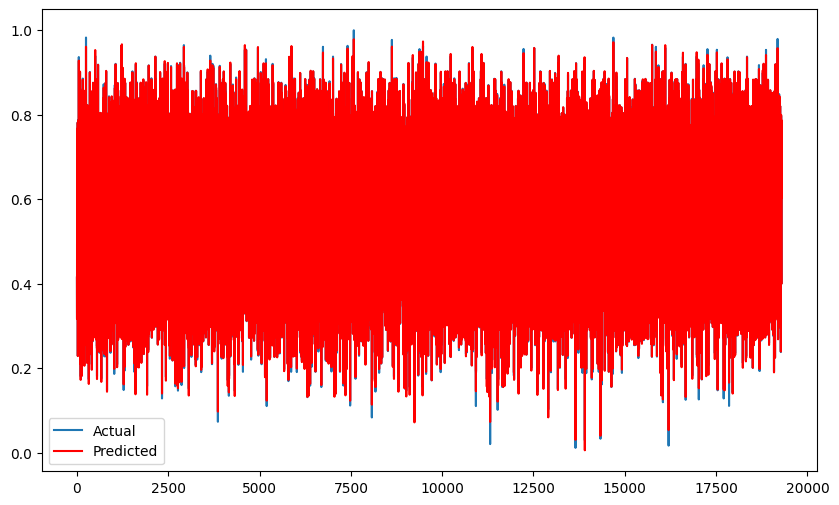

In [18]:
# Train XGBoost #
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predict #
y_pred = xgb_model.predict(X_test)

# Evaluate #
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE: {rmse_xgb}")

# Plot XGBoost Results #
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted', color='red')
plt.legend()
plt.show()



**Save the Model**

In [19]:
if rmse_xgb < rmse_arima:
    joblib.dump(xgb_model, 'best_model.pkl')
    print("XGBoost model saved.")
else:
    joblib.dump(model_fit, 'best_model.pkl')
    print("ARIMA model saved.")


XGBoost model saved.
